# Pymaceuticals Inc.

### Analysis

In [111]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
 

# Study data files
# Set up file paths for the 'Mouse_metadata' and 'Study_results'
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
# Used <pd.read_csv()>
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# Using <pd.merge()> for both variables and merging with the ["Mouse ID"] column
metadata_and_results = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
metadata_and_results


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [112]:
# Checking the number of mice.
# <.nunique()> to reutrn the # of unquie mouse ids.
total_mice = metadata_and_results["Mouse ID"].nunique()
# Displaying 'total_mice'
total_mice

249

In [113]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# <.duplicated(subset=[], keep= )> to identify duplicate rows based on the subset of ["columns"]
duplicate_mouse_ids = metadata_and_results[metadata_and_results.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [114]:
# Optional: Get all the data for the duplicate mouse ID. 
# Searching through all rows with value 'g989' in the ["Mouse ID"] column from 'metadata_and_results'
duplicate_data = metadata_and_results[metadata_and_results["Mouse ID"] == 'g989']
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [115]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Using <.reset_index()> to drop duplicates with the <drop=true> param.
clean_duplicated_mice = metadata_and_results.drop_duplicates(subset="Mouse ID")
clean_duplicated_mice = clean_duplicated_mice.reset_index(drop=True)
clean_duplicated_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
244,t565,0,45.0,0,Capomulin,Female,20,17
245,i557,0,45.0,0,Capomulin,Female,1,24
246,m957,0,45.0,0,Capomulin,Female,3,19
247,f966,0,45.0,0,Capomulin,Male,16,17


In [116]:
# Checking the number of mice in the clean DataFrame.
# Used <.nunique()> to display unique values from the ["Mouse ID"] column in 'clean_duplicated_mice' 
num_mice_cleaned = clean_duplicated_mice["Mouse ID"].nunique()
num_mice_cleaned

249

## Summary Statistics

In [117]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Using <.groupby()> to group the DataFrame metadata_and_results by the "Drug Regimen" column. And then <.mean()> 
# on the ["Tumor Volume (mm3)"] col.
mean_tumor_vol = metadata_and_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
# Using <.groupby()> to group the DataFrame metadata_and_results by the "Drug Regimen" column. And then <.median()> 
# on the ["Tumor Volume (mm3)"] col.
median_tumor_vol = metadata_and_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
# Using <.groupby()> to group the DataFrame metadata_and_results by the "Drug Regimen" column. And then <.var()> 
# on the ["Tumor Volume (mm3)"] col.
variance_tumor_vol = metadata_and_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
# Using <.groupby()> to group the DataFrame metadata_and_results by the "Drug Regimen" column. And then <.std()> 
# on the ["Tumor Volume (mm3)"] col.
std_dev_tumor_vol = metadata_and_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
# Using <.groupby()> to group the DataFrame metadata_and_results by the "Drug Regimen" column. And then <.sem()> 
# on the ["Tumor Volume (mm3)"] col.
sem_tumor_vol = metadata_and_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Created a new DF by using <pd.DataFrame()>
summary_statistics = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_vol,
    'Median Tumor Volume': median_tumor_vol,
    'Tumor Volume Variance': variance_tumor_vol,
    'Tumor Volume Std. Dev.': std_dev_tumor_vol,
    'Tumor Volume Std. Err.': sem_tumor_vol
})

# Displays 'summary_statistics'
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [130]:
# Using the aggregation method for summary statistics in a single line
# Used <.agg()> to calculate multiple summary statistics (mean, median, variance, standard deviation,
# and standard error of the mean) 
summary_statistics_advanced = metadata_and_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    [('mean', 'mean'),
     ('median', 'median'),
     ('var', 'var'),
     ('std', 'std'),
     ('sem', 'sem')]
)

# Creating a MultiIndex with a single level ('Tumor Volume (mm3)') and
# another level with the existing column names (mean, median, var, std, sem).
summary_statistics_advanced.columns = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], summary_statistics_advanced.columns])

# Displays 'summary_statistics_advanced'
summary_statistics_advanced


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

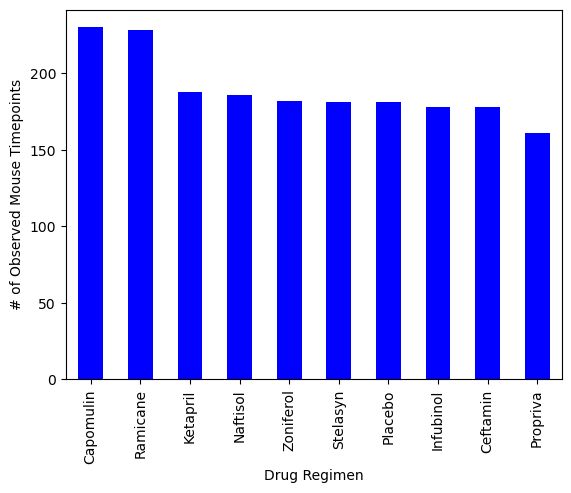

In [119]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Calculating the counts of each value in ["Drug Regimen"] col.
drug_counts_with_timepoint = metadata_and_results['Drug Regimen'].value_counts()

# Plotting a bar plot using <.plot()> and parameters to create blue bars
drug_counts_with_timepoint.plot(kind='bar', color='blue')

# Plotting the x label using <plt.xlabel()>
plt.xlabel('Drug Regimen')
# Plotting the y label using <plt.ylabel()>
plt.ylabel('# of Observed Mouse Timepoints')
# Displaying the bar chart
plt.show()


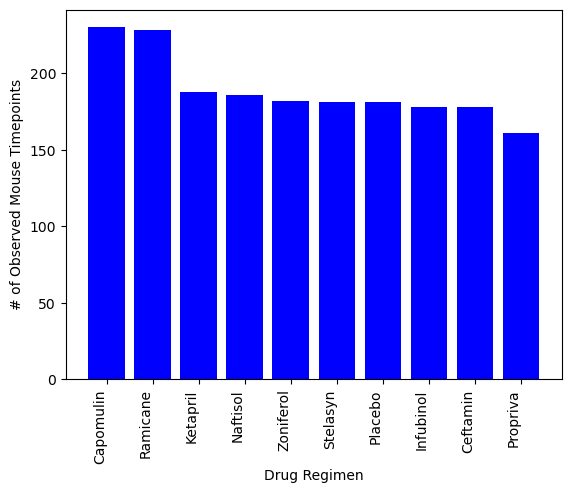

In [120]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_counts_with_timepoint = metadata_and_results['Drug Regimen'].value_counts()
drug_counts_with_timepoint

# Using <plt.bar(x,y,color=)> to set  up the axis and format the bar to blue 
plt.bar(drug_counts_with_timepoint.index, drug_counts_with_timepoint, color='blue')
# Plotting the x label using <plt.xlabel()>
plt.xlabel('Drug Regimen')
# Plotting the y label using <plt.ylabel()>
plt.ylabel('# of Observed Mouse Timepoints')
# Using <plt.xticks(rotation=. ha=)> to set up labels by 90 degrees and aligning to the right
plt.xticks(rotation=90, ha='right')
# Displaying the bar chart
plt.show()


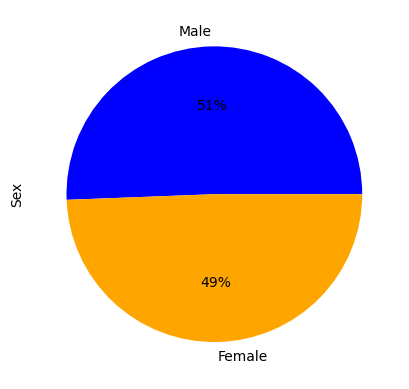

In [121]:
# Count the number of female and male mice
# Using <.value_counts()> to count the values of ["Sex"] column from 'metadata_and_results' 
gender_distribution = metadata_and_results['Sex'].value_counts()
# Round the percentages to no decimal places
# <.round()> to round to no decimals
rounded_distribution = gender_distribution.round(0)
# Create a pie plot using Pandas
# Using <.plot.pie(autopct=, colors=, startangle= )> to set the format, colors, and start of the data
rounded_distribution.plot.pie(autopct='%1.0f%%', colors=['blue', 'orange'], startangle=0)
# Plotting the y label using <plt.ylabel()>
plt.ylabel('Sex')
# Display the plot
plt.show()


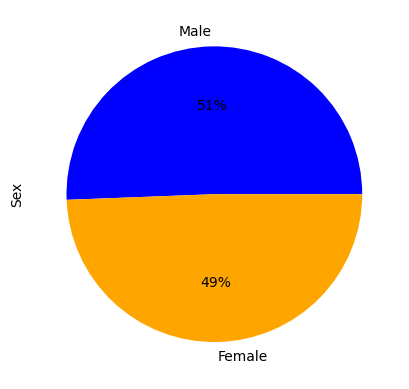

In [122]:
# Using <.value_counts()> to count the values of ["Sex"] column from 'metadata_and_results' 
gender_distribution = metadata_and_results['Sex'].value_counts()
# <.round()> to round to no decimals
rounded_distribution = gender_distribution.round(0)
# Using <plot.pie(autopct=, colors=, startangle= )> to set the format, colors, and start of the data
plt.pie(rounded_distribution, labels=rounded_distribution.index, autopct='%1.0f%%', colors=['blue', 'orange'], startangle=0)
# Plotting the y label using <plt.ylabel()>
plt.ylabel('Sex')
# Display the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [123]:
# Reminder of data were working with
metadata_and_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [124]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Created a list [] of different drugs
target_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
# Grouping the DF by ['Mouse ID'] and calculates the max (last) 'Timepoint' and reseting the index
last_timepoints = metadata_and_results.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Merging the two DF on similar columns (['Mouse ID']['Timepoint']) 
final_timepoints = pd.merge(last_timepoints, metadata_and_results, on=['Mouse ID', 'Timepoint'], how='left')
# <.isin()> to filter the final_timepoints DataFrame to include only rows where the 'Drug Regimen' is
# one of the target regimens ('Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'). 
final_timepoints_target_regimens = final_timepoints[final_timepoints['Drug Regimen'].isin(target_regimens)]
final_timepoints_target_regimens

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
239,y769,45,68.594745,4,Ceftamin,Female,6,27
240,y793,45,31.896238,2,Capomulin,Male,17,17
241,y865,45,64.729837,3,Ceftamin,Male,23,26
245,z578,45,30.638696,0,Ramicane,Male,11,16


In [125]:
# Put treatments into a list for for loop (and later for plot labels)
# Creating a list to hold data
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
# Creating empty list to hold values
tumor_vol_data = []

# For Loop
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Created a subset and looped through each treatment in the 'treatments' list
    subset = final_timepoints_target_regimens[final_timepoints_target_regimens['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add subset to tumor_vol_data list
    # 'subset' is added to 'tumor_vol_data'
    tumor_vol_data.append(subset)
    
    # Determine outliers using upper and lower bounds
    # Outlined values for the quantiles 
    quartiles = subset.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    # Used the outlier formula to gather boundaries
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Identify potential outliers
    potential_outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {potential_outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


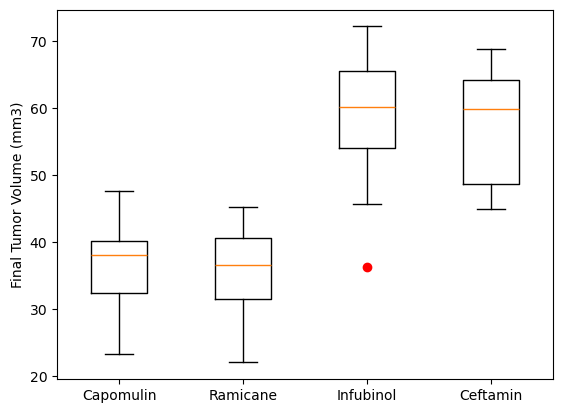

In [126]:
# Creating a box plot using <plt.boxplot(data,labels= , sym= )> to create a boxplot 
plt.boxplot(tumor_vol_data, labels=treatments, sym='r')
# Plotting the y label using <plt.ylabel()>
plt.ylabel('Final Tumor Volume (mm3)')
 # Displays plot created
plt.show()


## Line and Scatter Plots


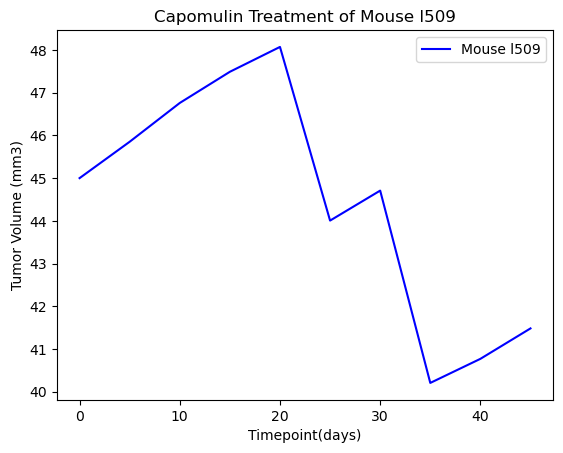

In [127]:
# Choose a Mouse ID treated with Capomulin (replace 'selected_mouse_id' with the actual Mouse ID)
# Chose the specifc mouse id
selected_mouse_id = 'l509'

capomulin_single_mouse_data = metadata_and_results[(metadata_and_results['Drug Regimen'] == 'Capomulin') & (metadata_and_results['Mouse ID'] == selected_mouse_id)]

# Generate the line plot
# <plt.plot(x,y,color=, label=)>
plt.plot(capomulin_single_mouse_data['Timepoint'], capomulin_single_mouse_data['Tumor Volume (mm3)'], color='b', label=f'Mouse {selected_mouse_id}')

# Set labels and title
# Plotting the x label using <plt.xlabel()>
plt.xlabel('Timepoint(days)')
# Plotting the y label using <plt.ylabel()>
plt.ylabel('Tumor Volume (mm3)')
# <plt.title()> to add a title to the plot 
plt.title(f'Capomulin Treatment of Mouse {selected_mouse_id}')
# Added a legend 
plt.legend()
# Show the plot
plt.show()


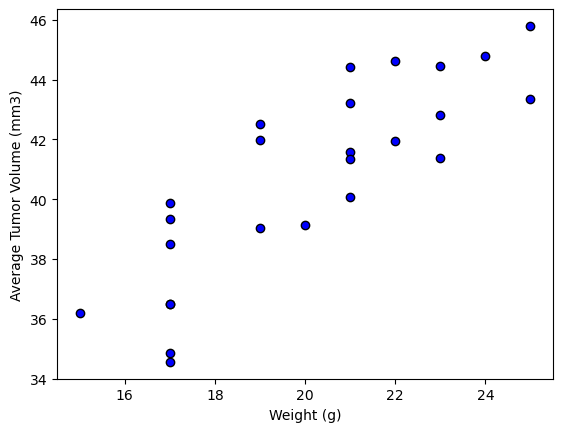

In [128]:
capomulin_data = metadata_and_results[metadata_and_results['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
# Groubed the Mouse ID and Tumor Volume to calculate the mean
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
# Merge average tumor volume with the mouse metadata to get the weight
# <pd.merge()> to merge the two dataset on same 'Mouse ID' values
capomulin_weight_volume = pd.merge(avg_tumor_volume, mouse_metadata, on='Mouse ID', how='left')
# Generate the scatter plot
# Used <plt.scatter()> to create a scatter plot with blue dots and borders
plt.scatter(capomulin_weight_volume['Weight (g)'], capomulin_weight_volume['Tumor Volume (mm3)'], color='blue', edgecolors='black')
# Set labels and title
# Plotting the x label using <plt.xlabel()>
plt.xlabel('Weight (g)')
# Plotting the y label using <plt.ylabel()>
plt.ylabel('Average Tumor Volume (mm3)')
# Show the plot
plt.show()


## Correlation and Regression

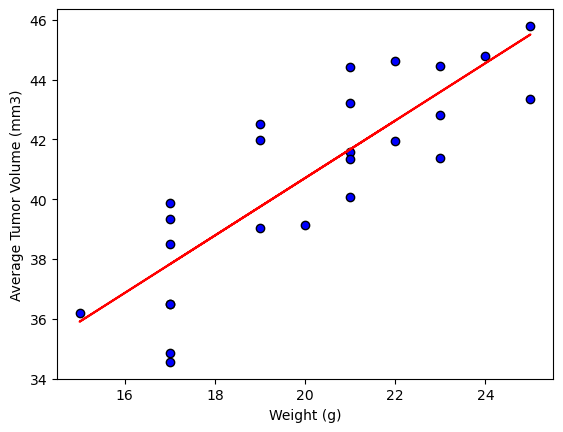

In [131]:
capomulin_data = metadata_and_results[metadata_and_results['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
# Figured out the linear regression line for machine learning
slope, intercept, r_value, p_value, std_err = linregress(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])
# Merge average tumor volume with the mouse metadata to get the weight
# <pd.merge()> to merge the two dataset on same 'Mouse ID' values
capomulin_weight_volume = pd.merge(avg_tumor_volume, mouse_metadata, on='Mouse ID', how='left')
# Used the regression line equation
regression_line = slope * capomulin_data['Weight (g)'] + intercept
# Generate the scatter plot
plt.scatter(capomulin_weight_volume['Weight (g)'], capomulin_weight_volume['Tumor Volume (mm3)'], color='blue', edgecolors='black')
plt.plot(capomulin_data['Weight (g)'], regression_line, color='red')
# Set labels and title
# Plotting the x label using <plt.xlabel()>
plt.xlabel('Weight (g)')
# Plotting the y label using <plt.ylabel()>
plt.ylabel('Average Tumor Volume (mm3)')
# Show the plot
plt.show()
